## Initialization Phase + Data Info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('df_filtered.csv', index_col=0)
df_LCU = df[df.Element == 'Producer Price (LCU/tonne)'].reset_index(drop=True)
df_USD = df[df.Element == 'Producer Price (USD/tonne)'].reset_index(drop=True)
df_PPI = df[df.Element == 'Producer Price Index (2014-2016 = 100)'].reset_index(drop=True)
all_df = [df_LCU, df_USD, df_PPI]

In [3]:
df_USD = df_USD[['Item', 'Year', 'Value']]

### Distribution of Produce by Year

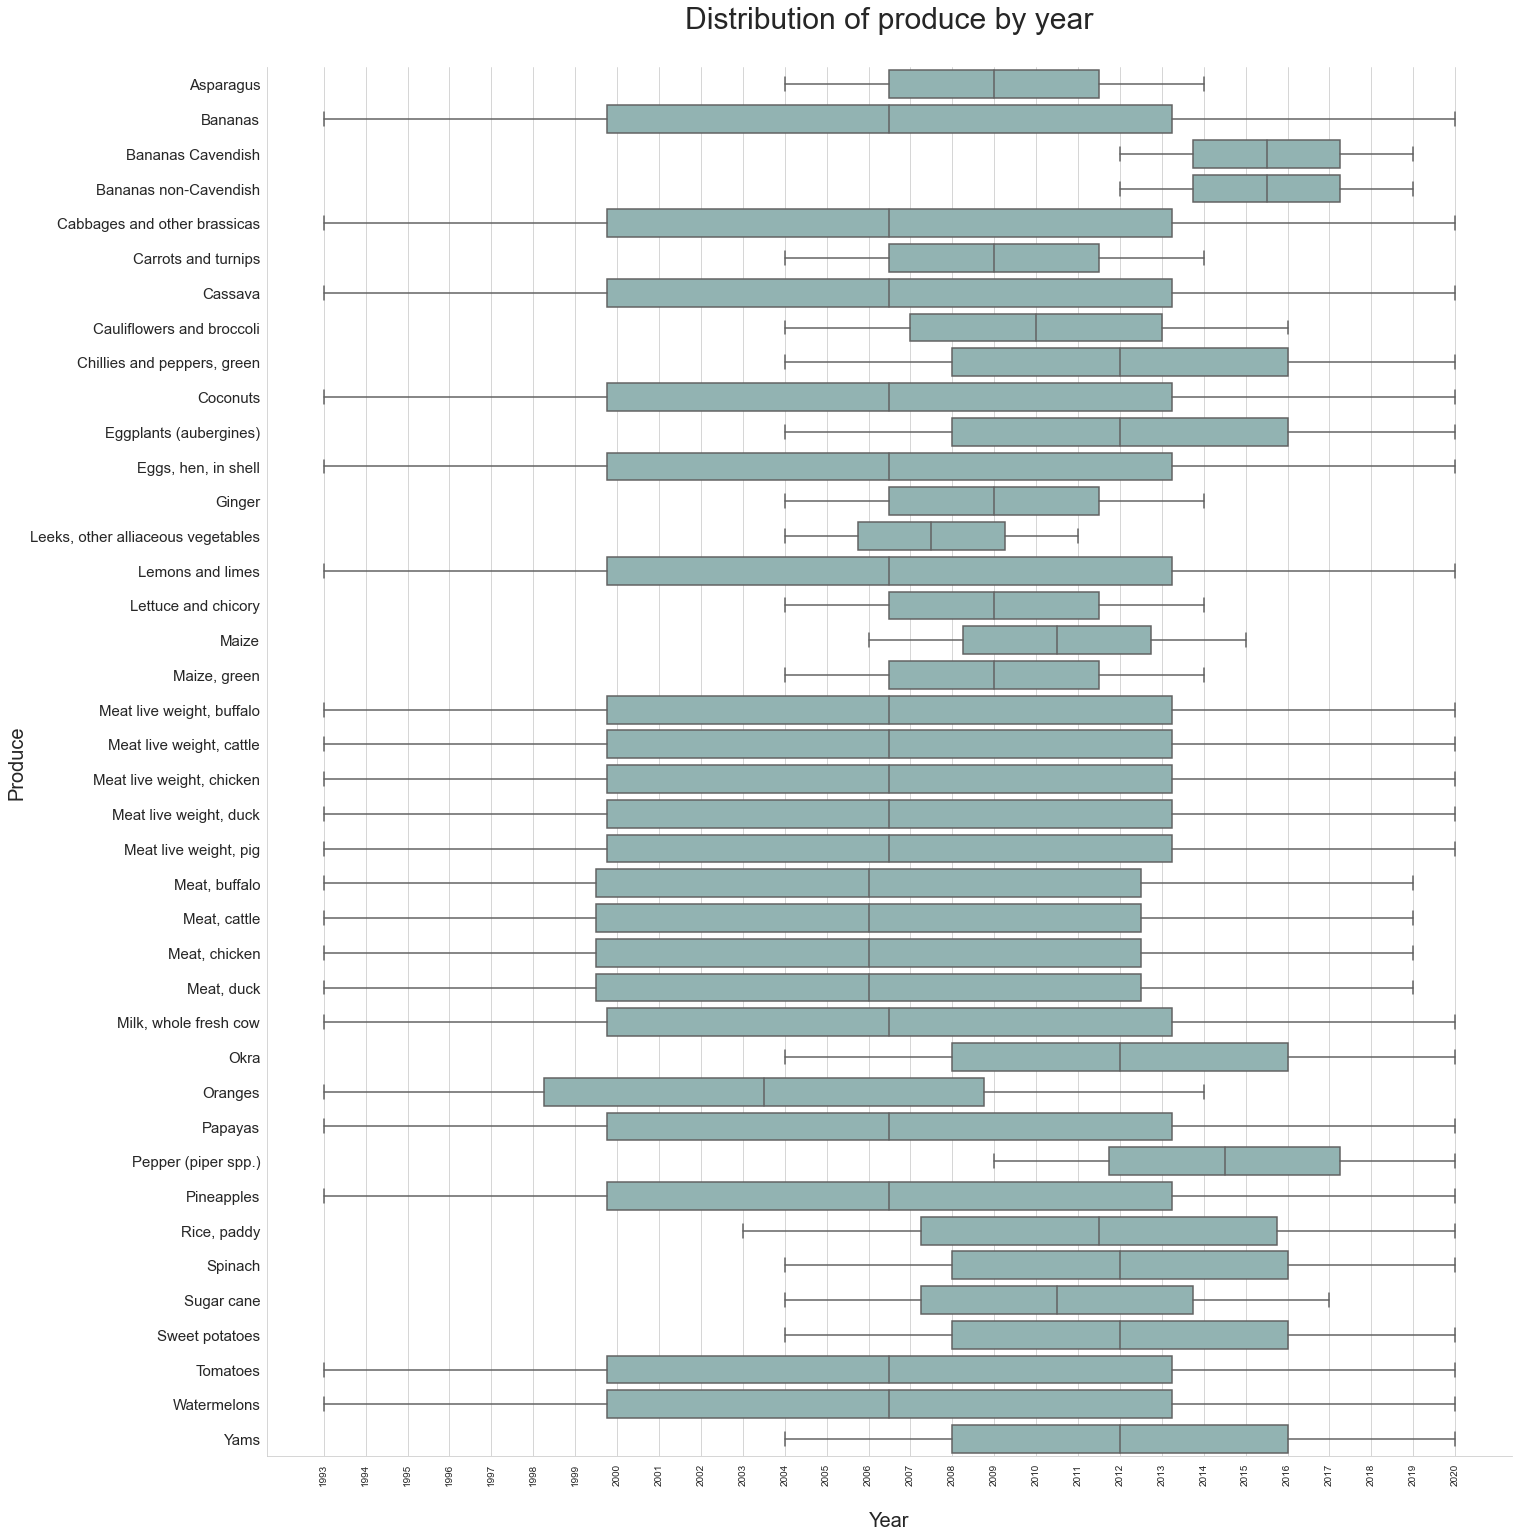

In [4]:
g = sns.catplot(
    data = df_USD,
    y = 'Item',
    x = 'Year',
    #aspect = 2.5,
    height = 20,
    kind='box',
    color = '#8cb8b7'
)

g.ax.set_title('Distribution of produce by year\n', fontdict={'fontsize':30})
g.ax.set_yticklabels(df_USD.Item.unique(), fontsize = '15')
g.ax.set_ylabel('Produce', fontsize = '20')
g.ax.set_xlabel('\nYear', fontsize = '20')
g.ax.set_xticks(df_USD.Year.unique())
g.ax.set_xticklabels(df_USD.Year.unique(), rotation = 90)
plt.show()


### Distribution of Produce Price by Year

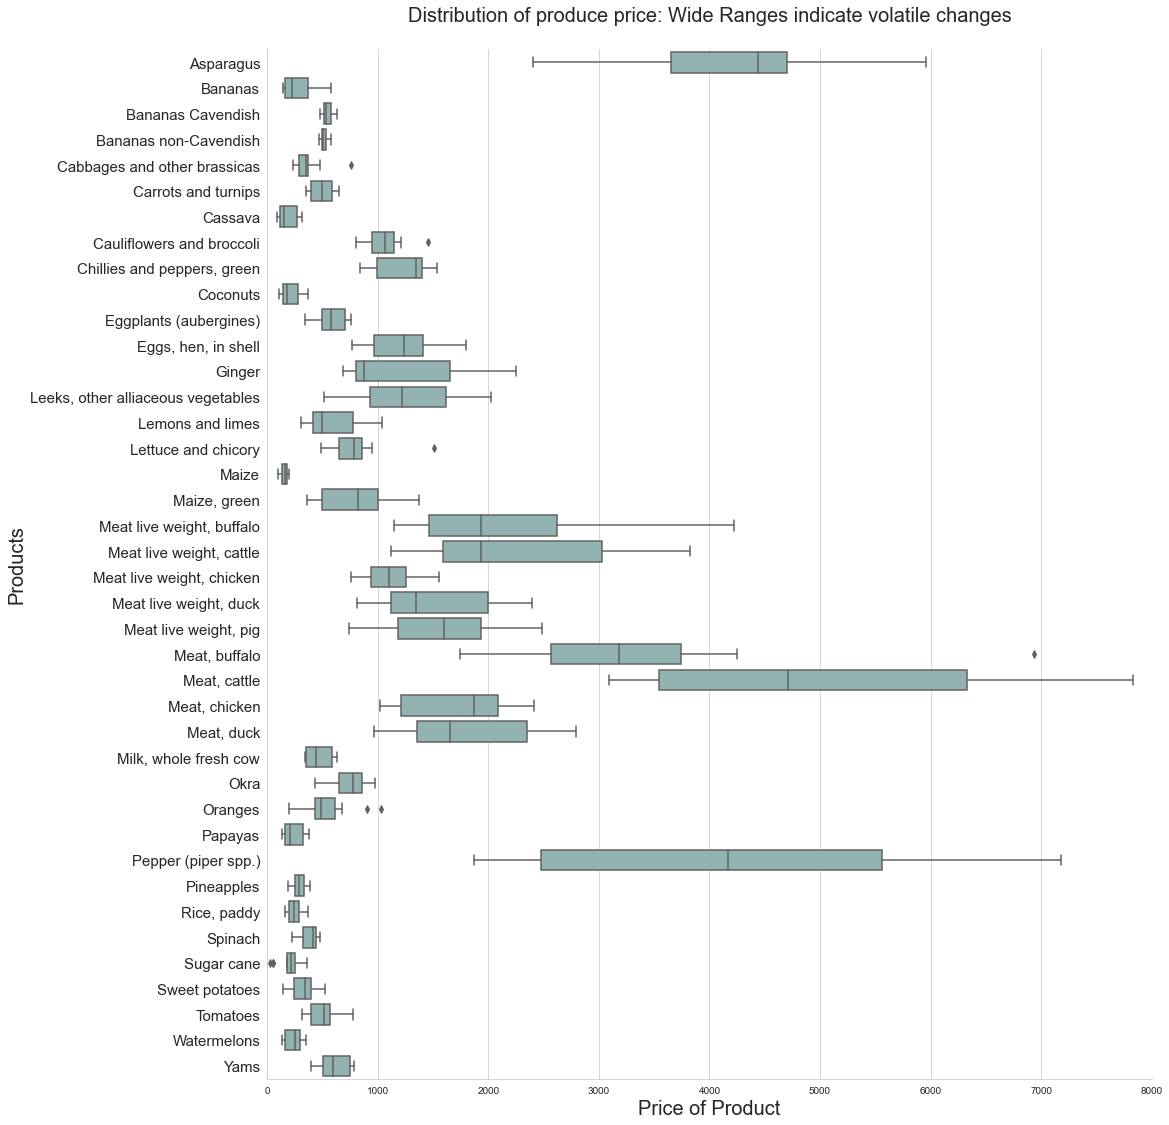

In [5]:
g = sns.catplot(
    data = df_USD,
    y = 'Item',
    x = 'Value',
    aspect = 1,
    height = 15,
    kind='box',
    color = '#8cb8b7'
)

g.ax.set_title('Distribution of produce price: Wide Ranges indicate volatile changes\n', fontdict={'fontsize':20})
g.ax.set_yticklabels(df_USD.Item.unique(), fontsize = '15')
g.ax.set_ylabel("Products",fontsize = '20')
g.ax.set_xlabel("Price of Product",fontsize = '20')
g.set(xlim=(0, 8000))
plt.show()

## Plotting Yearly Values to Yearly Growth Indexes

In [6]:
def data_restructure(item, start_date, end_date):
    a = df_USD[(df_USD.Item == item) & (df_USD.Year >= start_date) & (df_USD.Year <= end_date)].reset_index(drop=True)
    a['+/- (%)'] = round((a.Value * 100 / a.Value.shift(periods=1) - 100), 2)
    return a.iloc[:][['Item', 'Year', 'Value', '+/- (%)']]

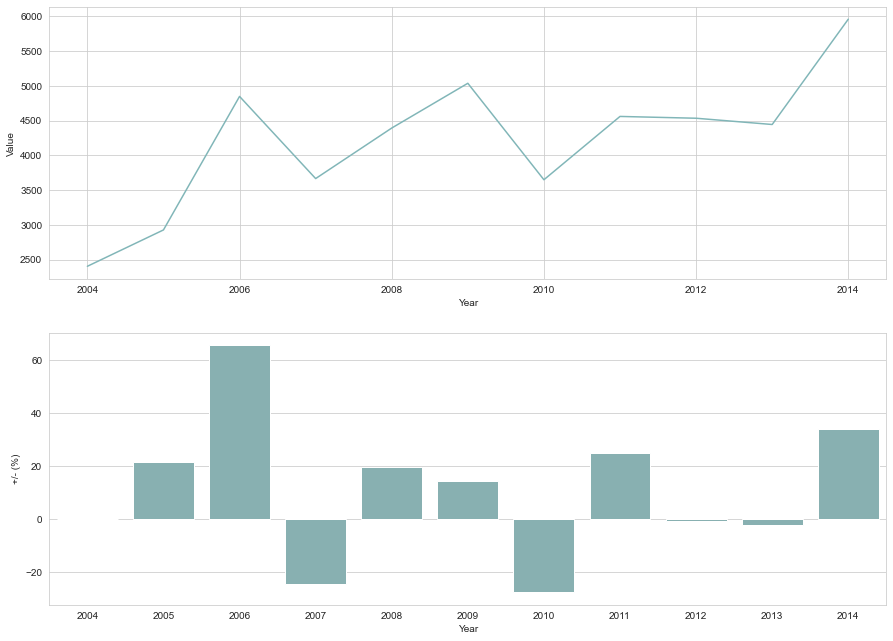

In [7]:
#df2 = data_restructure('Meat, chicken', 1990, 2020)
df2 = data_restructure('Asparagus', 1990, 2020)
df2.at[0, '+/- (%)'] = 0
fig, ax = plt.subplots(2, figsize = (15,11))
sns.lineplot(
    data = df2,
    x = 'Year',
    y = 'Value',
    ax = ax[0],
    color = '#81b6b8'
)

sns.barplot(
    data = df2,
    x = 'Year',
    y = '+/- (%)',
    color = '#81b6b8',
    ax = ax[1]
)

#ax[0].set_xticks([i for i in range (2004, 2015, 1)])
#ax[1].set_xticks([i for i in range (2004, 2015, 1)])
plt.show()

## PLOTTING RELATION & REGRESSION MODEL OF EACH PRODUCE

In [8]:
#a['+/- (%)'] = round((a.Value * 100 / a.Value.shift(periods=1) - 100), 2)
dataframe_list = []
for each in df_USD.Item.unique():
    placeholder_df = df_USD[df_USD.Item == each].copy()
    placeholder_df['Increment'] = round((placeholder_df.Value * 100 / placeholder_df.Value.shift(periods=1) / 100), 2)
    #print(placeholder_df)
    dataframe_list.append(placeholder_df)
output_df = pd.concat(dataframe_list)
output_df['Increment'] = output_df.Increment.apply(lambda x: abs(x)) #convert all increment to positive values

In [9]:
#output_df.groupby(by = 'Item').mean().sort_values(by = 'Year').index
output_df.groupby(by = 'Item').mean().sort_values(by = 'Increment')

,Year,Value,Increment
Item,,,
"Eggs, hen, in shell",2006.5,1217.071429,1.004444
"Meat, chicken",2006.0,1720.629630,1.005385
"Meat live weight, chicken",2006.5,1114.428571,1.011111
"Meat live weight, duck",2006.5,1524.035714,1.012963
Pineapples,2006.5,293.571429,1.018148
Pepper (piper spp.),2014.5,4265.083333,1.018182
Bananas non-Cavendish,2015.5,513.500000,1.022857
"Milk, whole fresh cow",2006.5,465.571429,1.024074
Lemons and limes,2006.5,591.607143,1.025926


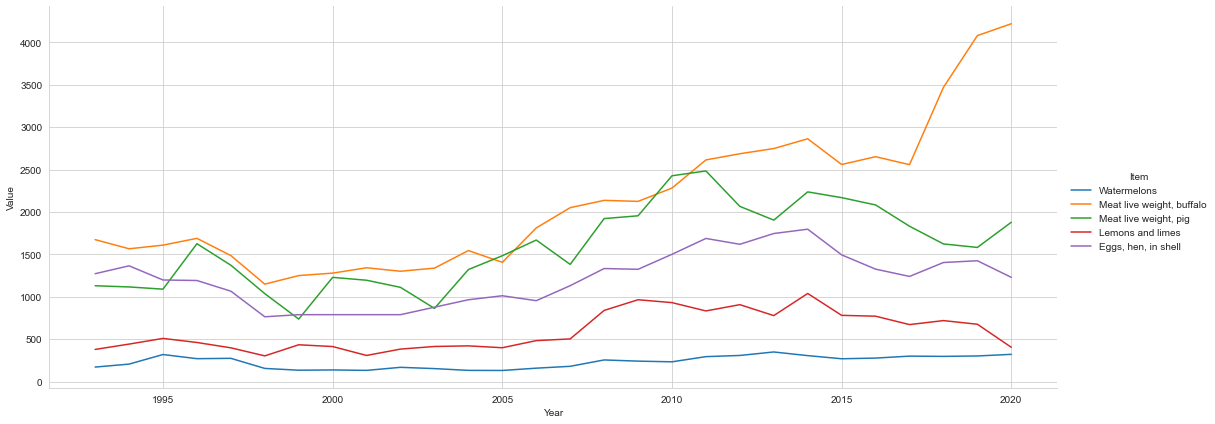

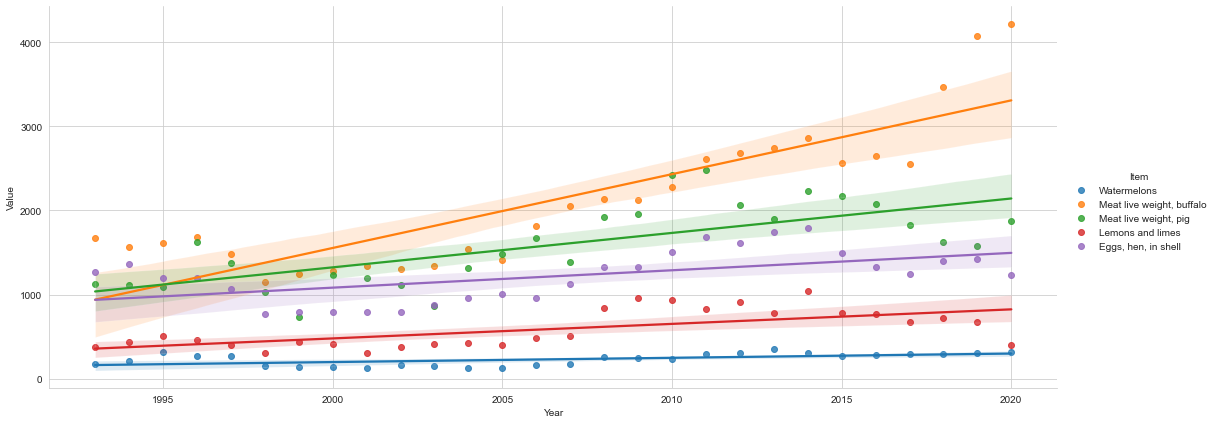

In [13]:
plot_relation(['Watermelons', 'Meat live weight, buffalo',
       'Meat live weight, pig', 'Lemons and limes', 'Eggs, hen, in shell'])

plot_regression(['Watermelons', 'Meat live weight, buffalo',
       'Meat live weight, pig', 'Lemons and limes', 'Eggs, hen, in shell'])

In [11]:
def plot_relation(item_list):
    g = sns.relplot(
        data = df_USD,
        hue = 'Item',
        hue_order = item_list,
        x = 'Year',
        y = 'Value',
        kind = 'line',
        height = 6,
        aspect = 2.5
    )
    
def plot_regression(item_list):
    g = sns.lmplot(
        data = df_USD,
        hue = 'Item',
        hue_order = item_list,
        x = 'Year',
        y = 'Value',
        height = 6,
        aspect = 2.5
    )